<a href="https://colab.research.google.com/github/omarhala15/omar97/blob/main/Sequential_api_(mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.datasets import fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [ ]:
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# importing various types of hidden layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam

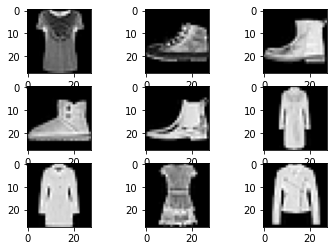

In [ ]:
for i in range(1,10):
  plt.subplot(3,3,i)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_valid_categorical = to_categorical(y_valid)
print("Finished categorizing the labels (output)")

Finished categorizing the labels (output)


In [ ]:
from keras.api._v2.keras import activations
models=keras.models.Sequential()
models.add(Conv2D(64,(5,5),padding='same',activation='tanh',input_shape=(28,28,1)))
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Conv2D(128,(5,5),padding='same',activation='tanh'))
models.add(MaxPooling2D(pool_size=(2,2)))
#models.add(Conv2D(256,(5,5),padding='same',activation='tanh'))
#models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Flatten())
models.add(Dense(10,activation='softmax'))

In [ ]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(400, activation="relu"),
 keras.layers.Dense(125, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer=Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy')

NameError: ignored

In [ ]:
%%time
History=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.2678 - sparse_categorical_accuracy: 0.8993 - val_loss: 0.3046 - val_sparse_categorical_accuracy: 0.8934
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.9016 - val_loss: 0.3093 - val_sparse_categorical_accuracy: 0.8898
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2420 - sparse_categorical_accuracy: 0.9073 - val_loss: 0.2924 - val_sparse_categorical_accuracy: 0.8956
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2350 - sparse_categorical_accuracy: 0.9117 - val_loss: 0.3005 - val_sparse_categorical_accuracy: 0.8966
Epoch 5/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2253 - sparse_categorical_accuracy: 0.9147 - val_loss: 0.3112 - val_sparse_categorical_accuracy: 0.8948
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2166 -

In [ ]:
models.compile(optimizer=Adam(learning_rate=1e-3),loss='sparse_categorical_crossentropy',
                       metrics=['sparse_categorical_accuracy'])
           

In [ ]:
history=models.fit(X_train,y_train,epochs=4,validation_data=(X_valid,y_valid))

Epoch 1/4
1719/1719 [==============================] - 414s 241ms/step - loss: 0.4087 - sparse_categorical_accuracy: 0.8566 - val_loss: 0.3048 - val_sparse_categorical_accuracy: 0.8964
Epoch 2/4
1719/1719 [==============================] - 388s 225ms/step - loss: 0.2833 - sparse_categorical_accuracy: 0.9000 - val_loss: 0.2682 - val_sparse_categorical_accuracy: 0.9088
Epoch 3/4
1719/1719 [==============================] - 389s 227ms/step - loss: 0.2392 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.2883 - val_sparse_categorical_accuracy: 0.8960
Epoch 4/4
1719/1719 [==============================] - 388s 226ms/step - loss: 0.2044 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.2982 - val_sparse_categorical_accuracy: 0.9004


In [ ]:
models.evaluate(X_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 50.4714 - sparse_categorical_accuracy: 0.8681


[50.47135925292969, 0.8680999875068665]

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 53.6063 - sparse_categorical_accuracy: 0.8616


[53.606319427490234, 0.8615999817848206]

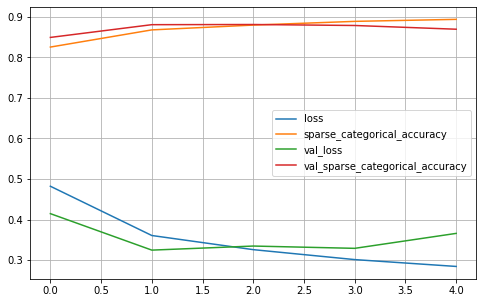

In [ ]:
pd.DataFrame(History.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3899 - sparse_categorical_accuracy: 0.8574


[0.3898991644382477, 0.8574000000953674]

In [ ]:
x_new=X_test[:3]
model.predict(x_new).round()


1/1 [==============================] - 0s 135ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(x_new),axis=1)
np.array(class_names)[y_pred]


1/1 [==============================] - 0s 22ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_pred = np.argmax(models.predict(x_new),axis=1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 104ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')